#Campbell's Theorem
$\DeclareMathOperator{\Var}{Var}$
Let $\Pi$ be a point process on $S$ ($S=\mathbb{R}^d$, e.g.) with mean measure $\mu$, and $f:S\rightarrow\mathbb{R}$ be measureable. Then

$$
\Sigma = \sum_{X\in\Pi}f(X)
$$

is _absolutely convergent with probability one_ iff

$$
\int_S\min(|f(x)|,1)\mu(dx)<\infty
$$

Further, if the sum is _absolutely convergent with probability one_, then

$$
E[e^{\theta\Sigma}]=\exp\left(\int_S(e^{\theta f(x)}-1)\mu(dx)\right)
$$

for any any complex $\theta$ for which the initegral on the right converges (in particular, when $\theta$ is purely imaginary). Further, if the integral converges,

\begin{align*}
E[\Sigma] &= \int_Sf(x)\mu(dx) \\
\Var(\Sigma) &= \int_Sf(x)^2\mu(dx)
\end{align*}

# Derivations

If we take

$$
E[e^{\theta\Sigma}]=\exp\left(\int_S(e^{\theta f(x)}-1)\mu(dx)\right)
$$

and expand the exponentials as power series in $\theta$, we get the expressions for $E[\Sigma]$ and $\Var(\Sigma)$. 

Starting with the left side,

\begin{align*}
E[e^{\theta\Sigma}] &= 
    E[e^{0} + \Sigma e^{0}\theta + \frac{1}{2}\Sigma^2e^0\theta^2+\ldots] \\
 &= E[1 + \Sigma\theta + \frac{1}{2}\Sigma^2\theta^2+\ldots] \\
 &= 1 + E[\Sigma]\theta + \frac{1}{2}E[\Sigma^2]\theta^2+\ldots \\
\end{align*}

And now the right side (which has two exponentials to expand),

\begin{align*}
\exp\left(\int_S(e^{\theta f(x)}-1)\mu(dx)\right) &= 
    \exp\left(\int_S\left(\left(e^0+f(x)e^0\theta+\frac{1}{2}f(x)^2e^0\theta^2+\ldots\right)-1\right)
    \mu(dx)\right) \\
 &= \exp\left(\int_S\left(\left(1+f(x)\theta+\frac{1}{2}f(x)^2\theta^2+\ldots\right)-1\right)\mu(dx)\right) \\
 &= \exp\left(\int_S\left(f(x)\theta+\frac{1}{2}f(x)^2\theta^2+\ldots\right)\mu(dx)\right) \\
 &= \exp\left(\theta\int_Sf(x)\mu(dx)+\frac{\theta^2}{2}\int_Sf(x)^2\mu(dx)+\ldots\right) \\
 &= 1 + \int_Sf(x)\mu(dx)\theta+
     \frac{1}{2}\left(\left(\int_Sf(x)\mu(dx)\right)^2+\int_Sf(x)^2\mu(dx)\right)\theta^2 + \ldots\\
\end{align*}

Equating the left and right side expansions, we have

$$
1 + E[\Sigma]\theta + \frac{1}{2}E[\Sigma^2]\theta^2+\ldots =
1 + \int_Sf(x)\mu(dx)\theta+
    \frac{1}{2}\left(\left(\int_Sf(x)\mu(dx)\right)^2+\int_Sf(x)^2\mu(dx)\right)\theta^2 + \ldots
$$

Setting the coefficients of the powers of $\theta$ equal, we have

$$
E[\Sigma] = \int_Sf(x)\mu(dx)
$$

and

\begin{align*}
\frac{1}{2}E[\Sigma^2] &= \frac{1}{2}\left(\left(\int_Sf(x)\mu(dx)\right)^2+\int_Sf(x)^2\mu(dx)\right) \\
E[\Sigma^2] &= \left(\int_Sf(x)\mu(dx)\right)^2+\int_Sf(x)^2\mu(dx) \\
\end{align*}

so

\begin{align*}
\Var(\Sigma) &= E[\Sigma^2] - E[\Sigma]^2 \\
 &= \int_Sf(x)^2\mu(dx) \\
\end{align*}

# Filtered renewal processes

Renewal processes are generalizations of the Poisson point process. In the Poisson point process, each interval between events is independent and identically distributed according to the exponential distribution. In a renewal process, intervals are also idependent and identically distributed, but the distribution is not restricted to be exponential.

Our synapse will be receiving spikes with some constant, arbitrary ISI distribution and outputting the filtered summation of the spikes. We're looking for the mean and variance of the synapse at any point in time picked uniformly over all time. That is, for any time, what is the mean and variance of the synaptic output? We can model the synapse using a filtered renewal process (when the spikes are Poisson, [see below](#Filtered-renewal-process-with-different-first-interval)) where the filter is given by 

$$
f(t) = 
\begin{cases}
\frac{1}{\tau}e^{-t/\tau} & t\ge0 \\
0 & t<0 \\
\end{cases}
$$

and the incoming spike statistics are modeled by the renewal process. Let the $i$th interspike intervals be denoted $T_i$, and since $T_i$ are $\mathrm{iid}$, $T_i \sim T$.

<div style="display:block; border: 1px solid black; padding: 15px;background-color: #EEEEFF;margin: 10px">
<h2> Filtered renewal process summary of results</h2>
\begin{align*}
E[X] &= \frac{1}{\tau}\sum_{i=1}^\infty E\left[e^{-T/\tau}\right]^i \\
E[X^2] &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i\left(1 +
    2\sum_{j=1}^{\infty}E\left[e^{-T/\tau}\right]^{j}\right) \\
\end{align*}
</div>

## Mean

Our filtered point process will be given by

\begin{align*}
X &= f(T_1) + f(T_1+T_2) + f(T_1+T_2+T_3) + \ldots \\
 &= \frac{1}{\tau}e^{-T_1/\tau} + \frac{1}{\tau}e^{-(T_1+T_2)/\tau} + 
     \frac{1}{\tau}e^{-(T_1+T_2+T_3)/\tau} + \ldots \\
 &= \frac{1}{\tau}\left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
     e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
 &= \frac{1}{\tau}\sum_{i=1}^\infty\prod_{j=1}^ie^{-T_j/\tau}
\end{align*}

The expected value is then

\begin{align*}
E[X] &= E\left[\frac{1}{\tau}\sum_{i=1}^\infty\prod_{j=1}^ie^{-T_j/\tau}\right] \\
 &= \frac{1}{\tau}\sum_{i=1}^\infty E\left[\prod_{j=1}^ie^{-T_j/\tau}\right] & \text{expectation is linear} \\
 &= \frac{1}{\tau}\sum_{i=1}^\infty\prod_{j=1}^iE\left[e^{-T_j/\tau}\right] & \text{intervals are independent} \\
 &= \frac{1}{\tau}\sum_{i=1}^\infty E\left[e^{-T/\tau}\right]^i & \text{intervals are identically distributed} \\
\end{align*}

## Variance

To calculate the variance, we use $\Var(X)=E[X^2]-E[X]^2$. To find $E[X^2]$, we start by expanding $X^2$.

\begin{align*}
X^2 &= \frac{1}{\tau^2}\left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
    e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right)
    \left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
    e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
 &= \frac{1}{\tau^2}
    \left(e^{-2T_1/\tau}+e^{-2T_1/\tau}e^{-2T_2/\tau}+e^{-2T_1/\tau}e^{-2T_2/\tau}e^{-2T_3/\tau}+\ldots\right)
    & \text{diagonal terms} \\
 &\quad + \frac{2}{\tau^2}\left(e^{-2T_1/\tau}e^{-T_2/\tau}+e^{-2T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots +
    e^{-2T_1/\tau}e^{-2T_2/\tau}e^{-T_3/\tau} + \ldots\right)
    & \text{cross terms} \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}\prod_{j=1}^{i}e^{-2T_j/\tau} +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}\sum_{k=i+1}^{\infty}
    \left(\prod_{j=1}^ie^{-2T_j/\tau}\right)\left(\prod_{m=i+1}^{k}e^{-T_m/\tau}\right) \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}\prod_{j=1}^{i}e^{-2T_j/\tau} +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}\left(\prod_{j=1}^ie^{-2T_j/\tau}\right)
    \sum_{k=i+1}^{\infty}\left(\prod_{m=i+1}^{k}e^{-T_m/\tau}\right) \\
\end{align*}

Now,

\begin{align*}
E[X^2] &= E\left[\frac{1}{\tau^2}\sum_{i=1}^{\infty}\prod_{j=1}^{i}e^{-2T_j/\tau} +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}\left(\prod_{j=1}^ie^{-2T_j/\tau}\right)
    \sum_{k=i+1}^{\infty}\left(\prod_{m=i+1}^{k}e^{-T_m/\tau}\right)\right] \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i
    \sum_{k=i+1}^{\infty}\left(\prod_{m=i+1}^{k}E\left[e^{-T_m/\tau}\right]\right) \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i
    \sum_{k=i+1}^{\infty}E\left[e^{-T/\tau}\right]^{k-i} \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i
    \sum_{n=1}^{\infty}E\left[e^{-T/\tau}\right]^{n} & \text{substituting }n=k-i \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i\left(1 +
    2\sum_{n=1}^{\infty}E\left[e^{-T/\tau}\right]^{n}\right) \\
\end{align*}

Therefore, an overall expression for the variance will be given by

$$
\Var(X) = \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i\left(1 +
    2\sum_{n=1}^{\infty}E\left[e^{-T/\tau}\right]^{n}\right) -
    \left(\frac{1}{\tau}\sum_{i=1}^\infty E\left[e^{-T/\tau}\right]^i\right)^2
$$

### Checking the filtered renewal equations with a Poisson process

With the Poisson process $T_i$ are iid and $T_i\sim Exp(\lambda)$.

We see $E\left[e^{-T/\tau}\right]$ and $E\left[e^{-2T/\tau}\right]$ in the expressions we've derived for the mean and variance. Let's find a general expression for $E\left[e^{-kT/\tau}\right]$ and then use this expression for $k=1$ and $k=2$

\begin{align*}
E\left[e^{-kT/\tau}\right] &= \int_{-\infty}^{\infty}e^{-kt/\tau}f_{T}(t)dt \\
 &= \int_{0}^{\infty}e^{-kt/\tau}\lambda e^{-\lambda t}dt \\
 &= \lambda\int_{0}^{\infty}e^{-t(k/\tau+\lambda)}dt \\
 &= \frac{-\lambda}{k/\tau+\lambda}\left[e^{-t(k/\tau+\lambda)}\right]_0^\infty \\
 &= \frac{\lambda}{k/\tau+\lambda} \\
 &= \frac{\lambda\tau}{k+\lambda\tau} \\
\end{align*}

Plugging into the equation for the expected value,

\begin{align*}
E[X] &= \frac{1}{\tau}\sum_{i=1}^\infty E\left[e^{-T/\tau}\right]^i  \\
 &= \frac{1}{\tau}\sum_{i=1}^\infty\left(\frac{\lambda\tau}{1+\lambda\tau}\right)^i \\
 &= \frac{1}{\tau}\frac{\frac{\lambda\tau}{1+\lambda\tau}}{1-\frac{\lambda\tau}{1+\lambda\tau}} \\
 &= \frac{1}{\tau}\frac{\lambda\tau}{1+\lambda\tau-\lambda\tau} \\
 &= \frac{1}{\tau}\frac{\lambda\tau}{1} \\
 &= \lambda
\end{align*}

The sum converges because $\lambda$ and $\tau$ are both positive numbers so $0\le\frac{\lambda\tau}{1+\lambda\tau}<1$. The expected value matches what we derived in the Poisson synapse [notebook](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_poisson.ipynb).

Now for the second moment,

\begin{align*}
E[X^2] &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i\left(1 +
    2\sum_{j=1}^{\infty}E\left[e^{-T/\tau}\right]^{j}\right) \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}\left(\frac{\lambda\tau}{2+\lambda\tau}\right)^i\left(1 +
    2\sum_{j=1}^{\infty}\left(\frac{\lambda\tau}{1+\lambda\tau}\right)^{j}\right) \\
 &= \frac{1}{\tau^2}\frac{\lambda\tau}{2}\left(1+2\lambda\tau\right) \\
 &= \frac{\lambda}{2\tau}+\lambda^2 \\
\end{align*}

which also matches what we derived in the Poisson synapse [notebook](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_poisson.ipynb).

Therefore,

\begin{align*}
\Var(X) &= \frac{\lambda}{2\tau} + \lambda^2 - \lambda^2 \\
 &= \frac{\lambda}{2\tau}
\end{align*}

---
# Filtered renewal process with different first interval

The filtered renewal process only models the synapse well when the spikes are sourced from a Poisson process.  Imagine that input spike times have been generated beforehand. Now pick any point in time to consider the synaptic output. Any time we pick will almost surely fall between two spikes. Because our filter is causal, the spike immediately after the chosen time (really any spike afterwards) does not affect the current synaptic output. The spike immediately preceding and all prior spikes do affect the current synaptic output. The interval from the time we picked to the spike immediately preceding it is $T_1$. What is the distribution of $T_1$ compared to the rest of the $T_i$? For an exponential distribution (as defines a Poisson process), $T_1\sim T_i$ because the exponential distribution is memoryless. In fact, the exponential distribution is the only continuous, memoryless distribution. Therefore, for any other continuous distribution (defining other renewal processes), we need to separately consider $T_1$ from the rest of the $T_i$.

Let $T'_1$ be the interval in which we start. $T'_1\sim T_i$. The time we pick could be anywhere uniformly within this interval so

$$T_1\sim \mathrm{Uniform}(0, T'_1)$$

Now we're in a position to figure out the mean and variance of the filtered renewal process with this first interval.

<div style="display:block; border: 1px solid black; padding: 15px;background-color: #EEEEFF;margin: 10px">
<h2> Filtered renewal process with different first interval summary of results </h2>
\begin{align*}
E[X] &= E\left[\frac{1}{T}\left(1-e^{-T/\tau}\right)\right]\sum_{i=0}^{\infty}E\left[e^{-T/\tau}\right]^i \\
E[X^2] &= \\
\end{align*}
</div>

## Mean

\begin{align*}
X &= \frac{1}{\tau}\left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
     e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
 &= \frac{1}{\tau}e^{-T_1/\tau}\left(1+e^{-T_2/\tau}+
     e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
\end{align*}

\begin{align*}
E[X] &= E\left[\frac{1}{\tau}e^{-T_1/\tau}\left(1+e^{-T_2/\tau}+
     e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \right] \\
 &= \frac{1}{\tau}E\left[e^{-T_1/\tau}\right]\left(1+E\left[e^{-T_2/\tau}\right]+
     E\left[e^{-T_2/\tau}\right]E\left[e^{-T_3/\tau}\right] + \ldots\right) \\
 &= \frac{1}{\tau}E\left[e^{-T_1/\tau}\right]\left(1+E\left[e^{-T_2/\tau}\right]+
     E\left[e^{-T_2/\tau}\right]E\left[e^{-T_3/\tau}\right] + \ldots\right) \\
 &= \frac{1}{\tau}E\left[e^{-T_1/\tau}\right]\left(1+E\left[e^{-T/\tau}\right]+
     E\left[e^{-T/\tau}\right]^2 + \ldots\right) \\
 &= \frac{1}{\tau}E\left[e^{-T_1/\tau}\right]\sum_{i=0}^{\infty}E\left[e^{-T/\tau}\right]^i \\
 &= E\left[\frac{1}{T}\left(1-e^{-T/\tau}\right)\right]\sum_{i=0}^{\infty}E\left[e^{-T/\tau}\right]^i \\
\end{align*}

where 

\begin{align*}
E\left[e^{-T_1/\tau}\right] &= E\left[E\left[e^{-T_1/\tau}|T_1'\right]\right] \\
 &= E\left[\int_0^{T_1'}\frac{1}{T_1'}e^{-t/\tau}dt\right] \\
 &= E\left[-\frac{\tau}{T_1'}\left[e^{-t/\tau}\right]_0^{T_1'}\right] \\
 &= E\left[\frac{\tau}{T_1'}\left(1-e^{-T_1'/\tau}\right)\right] \\
 &= E\left[\frac{\tau}{T}\left(1-e^{-T/\tau}\right)\right] \\
\end{align*}

## Variance

To calculate the variance, we use $\Var(X)=E[X^2]-E[X]^2$. To find $E[X^2]$, we start by expanding $X^2$.

\begin{align*}
X^2 &= \frac{1}{\tau^2}\left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
    e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right)
    \left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
    e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
 &= \frac{1}{\tau^2}
    \left(e^{-2T_1/\tau}+e^{-2T_1/\tau}e^{-2T_2/\tau}+e^{-2T_1/\tau}e^{-2T_2/\tau}e^{-2T_3/\tau}+\ldots\right)
    & \text{diagonal terms} \\
 &\quad + \frac{2}{\tau^2}\left(e^{-2T_1/\tau}e^{-T_2/\tau}+e^{-2T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots +
    e^{-2T_1/\tau}e^{-2T_2/\tau}e^{-T_3/\tau} + \ldots\right)
    & \text{cross terms} \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}\prod_{j=1}^{i}e^{-2T_j/\tau} +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}\sum_{k=i+1}^{\infty}
    \left(\prod_{j=1}^ie^{-2T_j/\tau}\right)\left(\prod_{m=i+1}^{k}e^{-T_m/\tau}\right) \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}\prod_{j=1}^{i}e^{-2T_j/\tau} +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}\left(\prod_{j=1}^ie^{-2T_j/\tau}\right)
    \sum_{k=i+1}^{\infty}\left(\prod_{m=i+1}^{k}e^{-T_m/\tau}\right) \\
\end{align*}

Now,

\begin{align*}
E[X^2] &= E\left[\frac{1}{\tau^2}\sum_{i=1}^{\infty}\prod_{j=1}^{i}e^{-2T_j/\tau} +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}\left(\prod_{j=1}^ie^{-2T_j/\tau}\right)
    \sum_{k=i+1}^{\infty}\left(\prod_{m=i+1}^{k}e^{-T_m/\tau}\right)\right] \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i
    \sum_{k=i+1}^{\infty}\left(\prod_{m=i+1}^{k}E\left[e^{-T_m/\tau}\right]\right) \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i
    \sum_{k=i+1}^{\infty}E\left[e^{-T/\tau}\right]^{k-i} \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i +
    \frac{2}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i
    \sum_{n=1}^{\infty}E\left[e^{-T/\tau}\right]^{n} & \text{substituting }n=k-i \\
 &= \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i\left(1 +
    2\sum_{n=1}^{\infty}E\left[e^{-T/\tau}\right]^{n}\right) \\
\end{align*}

Therefore, an overall expression for the variance will be given by

$$
\Var(X) = \frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i\left(1 +
    2\sum_{n=1}^{\infty}E\left[e^{-T/\tau}\right]^{n}\right) -
    \left(\frac{1}{\tau}\sum_{i=1}^\infty E\left[e^{-T/\tau}\right]^i\right)^2
$$

### Checking the filtered renewal equations with a uniform, deterministic process

The deterministic uniform process violates the assumption that the $T_i$ are iid because $T_1=\frac{1}{\lambda}-T_0$ where $T_0\sim\text{Uniform}(0, \frac{1}{\lambda})$ while $T_i=\frac{1}{\lambda}$ for $i>1$. That is, only the offset $T_0$ is actually random.

\begin{align*}
E[X] &= E\left[\frac{1}{T}\left(1-e^{-T/\tau}\right)\right]\sum_{i=0}^{\infty}E\left[e^{-T/\tau}\right]^i \\
 &= \lambda\left(1-e^{-1/\lambda\tau}\right)\sum_{i=0}^{\infty}(e^{-1/\lambda\tau})^i \\
 &= \lambda\left(1-e^{-1/\lambda\tau}\right)\frac{1}{1-e^{-1/\lambda\tau}} \\
 &= \lambda \\
\end{align*}

------------------

Since the $T_i$ are not iid, we need to reexamine the first and second moment derivations. Without the assumption of identical distributions,

\begin{align*}
E[X] &= \frac{1}{\tau}\sum_{i=1}^\infty\prod_{j=1}^iE\left[e^{-T_j/\tau}\right] \\
 &= \frac{1}{\tau}\left(E\left[e^{-T_1/\tau}\right]+
    E\left[e^{-T_1/\tau}\right]E\left[e^{-T_2/\tau}\right] + 
    E\left[e^{-T_1/\tau}\right]E\left[e^{-T_2/\tau}\right]E\left[e^{-T_3/\tau}\right] + \ldots\right) \\
 &= \frac{1}{\tau}E\left[e^{-T_1/\tau}\right]\left(1+
    E\left[e^{-T_2/\tau}\right] + 
    E\left[e^{-T_2/\tau}\right]E\left[e^{-T_3/\tau}\right] + \ldots\right) \\
 &= \frac{1}{\tau}E\left[e^{-(1/\lambda-T_0)/\tau}\right]\left(1+
    e^{-1/\lambda\tau} + e^{-2/\lambda\tau} + \ldots\right) \\
 &= \frac{1}{\tau}E\left[e^{T_0/\tau}\right]\left(e^{-1/\lambda\tau}+
    e^{-2/\lambda\tau} + e^{-3/\lambda\tau} + \ldots\right) \\
 &= \frac{1}{\tau}E\left[e^{T_0/\tau}\right]\frac{e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}} \\
 &= \frac{1}{\tau}\lambda\tau e^{1/\lambda\tau}\left(1-e^{-1/\lambda\tau}\right)
    \frac{e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}} & E\left[e^{T_0/\tau}\right] \text{ derived below} \\
 &= \lambda \\
\end{align*}

which matches the value we derived in the uniform synapse [notebook](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_uniform.ipynb).

For the second moment, we step back to the original expression

\begin{align*}
X^2 &= \frac{1}{\tau^2}\left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
    e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right)
    \left(e^{-T_1/\tau}+e^{-T_1/\tau}e^{-T_2/\tau}+
    e^{-T_1/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
 &= \frac{1}{\tau^2}e^{T_0/\tau}\left(e^{-T_1'/\tau}+e^{-T_1'/\tau}e^{-T_2/\tau}+
    e^{-T_1'/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right)
    e^{T_0/\tau}\left(e^{-T_1'/\tau}+e^{-T_1'/\tau}e^{-T_2/\tau}+
    e^{-T_1'/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
 &= e^{2T_0/\tau}\frac{1}{\tau^2}\left(e^{-T_1'/\tau}+e^{-T_1'/\tau}e^{-T_2/\tau}+
    e^{-T_1'/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right)
    \left(e^{-T_1'/\tau}+e^{-T_1'/\tau}e^{-T_2/\tau}+
    e^{-T_1'/\tau}e^{-T_2/\tau}e^{-T_3/\tau} + \ldots\right) \\
 &= e^{2T_0/\tau}\tilde{X}^2 \\
\end{align*}

where $T_1'=\frac{1}{\lambda}$ and so $\tilde{X}$ will be the filtered uniform process without any offset due to $T_0$.

\begin{align*}
E[X^2] &= E\left[e^{2T_0/\tau}\right]\frac{1}{\tau^2}\sum_{i=1}^{\infty}E\left[e^{-2T/\tau}\right]^i\left(1 +
    2\sum_{n=1}^{\infty}E\left[e^{-T/\tau}\right]^{n}\right) \\
 &= \frac{\lambda\tau}{2}e^{2/\lambda\tau}\left(1-e^{-2/\lambda\tau}\right)
    \frac{1}{\tau^2}\sum_{i=1}^{\infty}\left(e^{-2/\lambda\tau}\right)^i\left(1 +
    2\sum_{n=1}^{\infty}\left(e^{-1/\lambda\tau}\right)^{n}\right) \\
 &= \frac{\lambda\tau}{2}e^{2/\lambda\tau}\left(1-e^{-2/\lambda\tau}\right)
    \frac{1}{\tau^2}\frac{e^{-2/\lambda\tau}}{1-e^{-2/\lambda\tau}}\left(1 +
    2\frac{e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}}\right) \\
 &= \frac{\lambda}{2\tau}\left(1 + 2\frac{e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}}\right) \\
 &= \frac{\lambda}{2\tau}\left(\frac{1-e^{-1/\lambda\tau}+2e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}}\right) \\
 &= \frac{\lambda}{2\tau}\left(\frac{1+e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}}\right) \\
 &= \frac{\lambda}{2\tau}\coth\left(\frac{1}{2\lambda\tau}\right) \\
\end{align*}

which also matches the value we derived in the uniform synapse [notebook](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_uniform.ipynb).

Therefore,

\begin{align*}
\Var(x) &= E[x^2]-E[x]^2 \\
 &=  \frac{\lambda}{2\tau}\coth\left(\frac{1}{2\lambda\tau}\right) - \lambda^2 \\
 &=  \lambda^2\left(\frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right) - 1\right) \\
 &=  \lambda^2\left(\frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right) - 1\right). \\
\end{align*}

For $c\neq0$,

\begin{align*}
E\left[e^{cT_0/\tau}\right] &= \int_0^{1/\lambda}\frac{1}{1/\lambda}e^{ct/\tau}dt \\
 &= \frac{\lambda\tau}{c}\left[e^{ct/\tau}\right]_0^{1/\lambda} \\
 &= \frac{\lambda\tau}{c}\left(e^{c/\lambda\tau}-1\right) \\
 &= \frac{\lambda\tau}{c}e^{c/\lambda\tau}\left(1-e^{-c/\lambda\tau}\right) \\
\end{align*}

# open questions and directions

We are also interested in the covariance of the filtered renewal process.

More generally, are there expressions for the moment generating function or characteristic equation?

# Appendix

## Memorylessness affects first interval distribution

Here are simulations showing that the distribution of the first interval seen by a synapse depends on whether or not the distribution is memoryless (i.e. exponential).  For exponential distributions, the first interval has the same distribution as any other interval. For all other distributions, the first interval distribution is different.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gamma, expon

s = np.random.seed(2)
rng = np.random.RandomState(s)

In [2]:
# check that indeed we need to consider the first interval specially
def plot_interval_pdf(n_intervals, isi_generator, pdf_generator=None, nspikes=10000, ntrials=30000):
    isi = isi_generator(nspikes-1)
    tspk = np.zeros(nspikes)
    tspk[1:] = np.cumsum(isi)
    max_tspk = tspk[-1]

    t_samples = rng.uniform(0, tspk[-n_intervals], ntrials)
    T = [np.zeros(ntrials) for i in xrange(n_intervals)]
    for idx, t in enumerate(t_samples):
        tspk_idx = np.where(t<tspk)[0][0]
        for n in xrange(n_intervals):
            T[n][idx] = tspk[tspk_idx+n] - t
            for i in xrange(n):
                T[n][idx] -= T[i][idx]

    fig, axs = plt.subplots(nrows=n_intervals, sharex=True, figsize=(8,3*n_intervals))
    if n_intervals == 1:
        axs = [axs]
    for n in xrange(n_intervals):
        axs[n].hist(T[n], bins=100, normed=True, histtype='stepfilled')
        axs[n].set_title('T%d distribution' % (n+1), fontsize=12)

    max_T = axs[-1].get_xlim()[-1]
    T = np.linspace(0, max_T, 100)
    
    if pdf_generator is not None:
        for n in xrange(n_intervals):
            axs[n].plot(T, pdf_generator(T), 'r', lw=2)
        axs[-1].set_xlim(0, max_T)
    axs[-1].set_xlabel('time', fontsize=12)

def check_gamma_intervals(lam, k, n_intervals=3):
    isi_generator = lambda n: rng.gamma(k, 1./lam, n)
    pdf_generator = lambda T: gamma.pdf(T, k, scale=1./lam)
    plot_interval_pdf(n_intervals, isi_generator, pdf_generator)

def check_exp_intervals(lam, n_intervals=3):
    isi_generator = lambda n: rng.exponential(1./lam, n)
    pdf_generator = lambda T: expon.pdf(T, scale=1./lam)
    plot_interval_pdf(n_intervals, isi_generator, pdf_generator)

def check_fixed_intervals(lam, n_intervals=3):
    isi_generator = lambda n: np.zeros(n) + 1./lam
    plot_interval_pdf(n_intervals, isi_generator)

First, let's check a renewal process defined by a gamma distribution. Below are plots for the pdfs of $T_1$, $T_2$, and $T_3$, (the first, second, and third intervals).

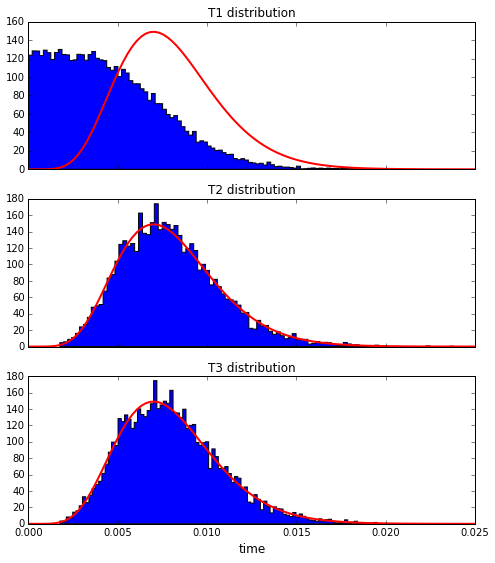

In [3]:
check_gamma_intervals(lam=1000., k=8)

The blue histogram shows the empirical pdf and the red line shows the theoretical pdf of $T$. As expected $T_1$ has a different distribution than $T_2$ and $T_3$, which match the theoretical pdf.

Next, we check the Poisson process, which has exponentially distributed intervals.

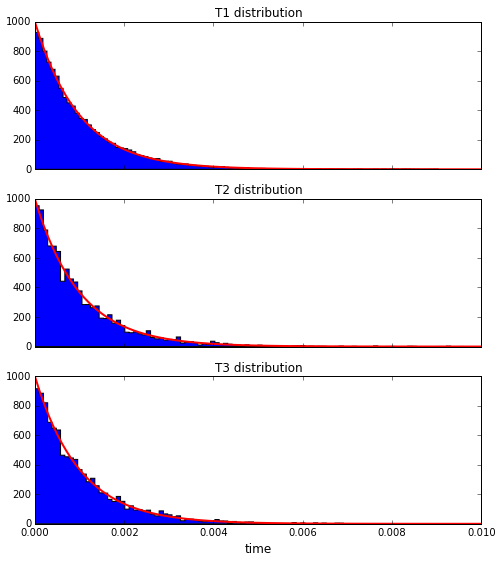

In [4]:
check_exp_intervals(lam=1000.)

As expected, $T_1$ is distributed just like any other $T_i$ because the exponential distribution is memoryless.

Now we check a deterministic spike process with fixed intervals.

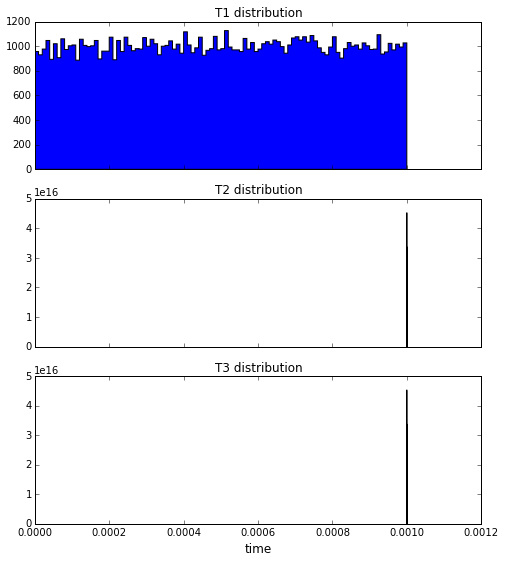

In [5]:
check_fixed_intervals(lam=1000.)

The $T_1$ distribution is uniformly up to $1/\lambda$ whereas the rest of the $T_i$ are delta functions at $1/\lambda$.

Returning to the gamma renewal process, let's vary $k$ and see how the distribution of $T_1$ changes.

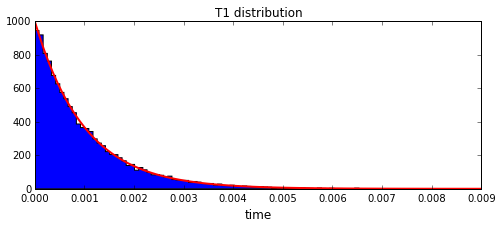

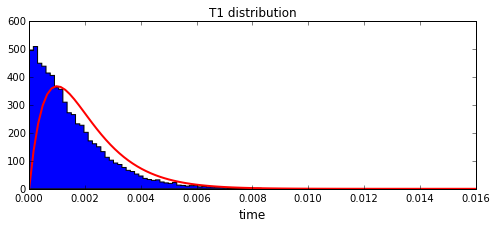

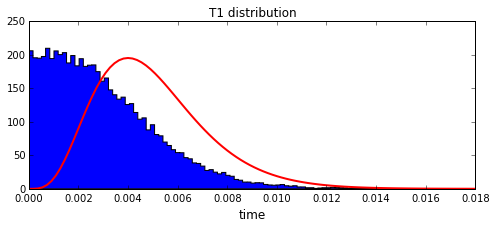

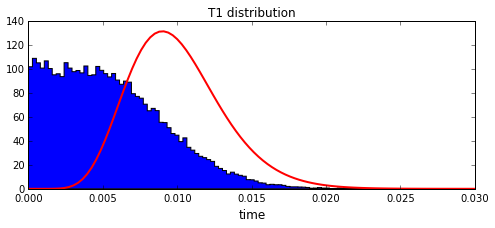

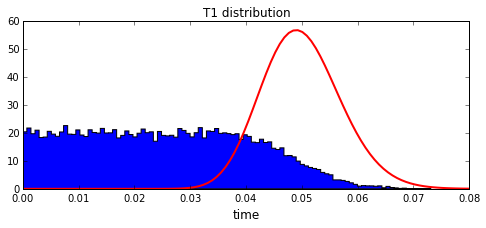

In [8]:
for k in [1, 2, 5, 10, 50]:
    check_gamma_intervals(lam=1000., k=k, n_intervals=1)

When $k=1$, we see $T_1$ matches the exponential distribution as we would expect. Otherwise, $T_1$ gets stretches as $k$ increases. Interestingly, the pdf looks relatively flat from $0$ to when the actual gamma distribution begins to have large values. Why would that be?